In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
df = pd.read_csv('feature_selection_result.csv', dtype=str)
df['Sensitivity'] = array(df['Sensitivity']).astype(float)
df['Specificity'] = array(df['Specificity']).astype(float)
df['MCC']         = array(df['MCC']).astype(float)
df['AUC']         = array(df['AUC']).astype(float)
df = df.sort_values('MCC', ascending=False)
df.head()

,Features,Sensitivity,Specificity,MCC,AUC
1312,010100100000,0.755,0.846,0.602,0.814
1376,010101100000,0.772,0.824,0.597,0.807
288,000100100000,0.746,0.836,0.584,0.779
1313,010100100001,0.748,0.816,0.565,0.800
352,000101100000,0.754,0.811,0.565,0.792


In [92]:
def binary_to_str(binary):
    features = [
        'CADD1', 'CADD2', 'RecA', 'EssA',
        'CADD3', 'CADD4', 'RecB', 'EssB',
        'Distace', 'Path', 'Co-exp', 'AllState'
    ]
    return ','.join(
        str(features[j]) for j, v in enumerate(binary) if v == '1'
    )

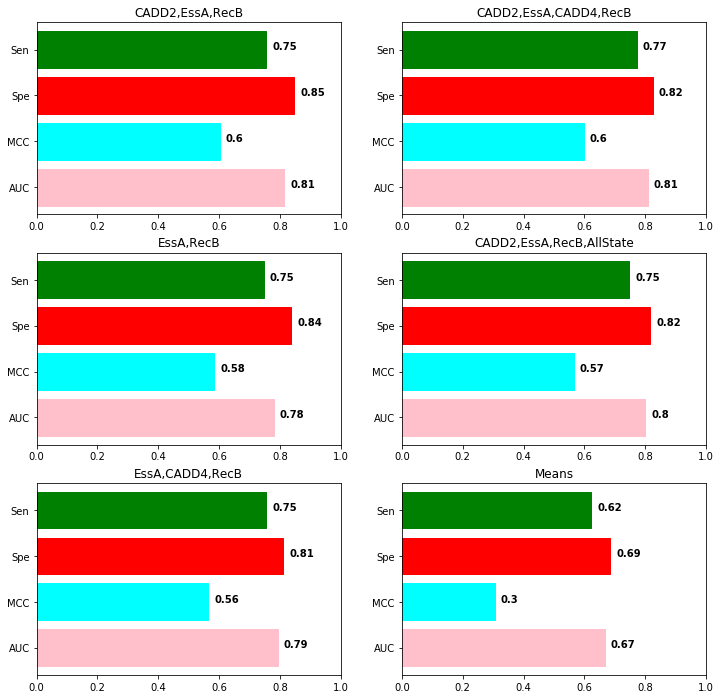

In [93]:
labels = ('Sen', 'Spe', 'MCC', 'AUC')

figure( figsize(12,12) )

for i in range(1, 7):
    ax = subplot(3, 2, i)
    y_pos = arange(len(labels))
    
    if i < 6:
        line = array(df.iloc[i - 1])
    else:
        line = array(df.mean())
    
    bars = ax.barh(y_pos, line[1:], align='center')
    bars[0].set_color('g')
    bars[1].set_color('r')
    bars[2].set_color('Cyan')
    bars[3].set_color('Pink')
    for j, v in zip(y_pos, line[1:]):
        text(v + .02, j, str(round(v * 100)/100), color='black', fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()
    xlim( (0, 1) )
    title(binary_to_str(line[0]) if i < 6 else 'Means')

In [34]:
means = [
    [0]*5 for _ in range(12)
]

for line in array(df):
    for i, bi in enumerate(line[0]):
        if bi == '1': continue;
        means[i][0] += 1
        means[i][1] += line[1]
        means[i][2] += line[2]
        means[i][3] += line[3]
        means[i][4] += line[4]

means = [ [ means[i][j] / means[i][0] for j in range(1, 5)] for i in range(12) ]